# Getting Started

This notebook is inspired to the Stable Baselines3 tutorial available at [https://github.com/araffin/rl-tutorial-jnrr19](https://github.com/araffin/rl-tutorial-jnrr19).


## Introduction

In this notebook, we will learn how to use **Gymnasium** environments and the basics of **Stable Baselines3**: how to instance an RL algorithm, train and evaluate it.

### Links

Gymnasium Github: [https://github.com/Farama-Foundation/Gymnasium](https://github.com/Farama-Foundation/Gymnasium)

Gymnasium Documentation: [https://gymnasium.farama.org/index.html](https://gymnasium.farama.org/index.html#)

Stable Baselines 3 Github:[https://github.com/DLR-RM/stable-baselines3](https://github.com/DLR-RM/stable-baselines3)

Stable Baseline 3 Documentation: [https://stable-baselines3.readthedocs.io/en/master/](https://stable-baselines3.readthedocs.io/en/master/)

## Install Gymnasium and Stable Baselines3 Using Pip

In [ ]:
!pip install gymnasium # import gymnasium
!pip install renderlab  #For rendering
!pip install stable-baselines3[extra] # last package to be installed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 11.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidi

In [ ]:
import gymnasium as gym
import renderlab
import stable_baselines3

print(f"The version of gymnasium is {gym.__version__}")
print(f"The version of stable_baseline3 is {stable_baselines3.__version__}")

  and should_run_async(code)



The version of gymnasium is 0.29.1
The version of stable_baseline3 is 2.3.2


## Initializing Environments

Initializing environments in Gym and is done as follows. We can find a list of available environment [here](https://gym.openai.com/envs/#classic_control).

In [ ]:
env = gym.make('CartPole-v1')

env_eval = gym.make('CartPole-v1', render_mode = "rgb_array")
env_eval = renderlab.RenderFrame(env_eval, "./output")

"A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. "

Cartpole Environment Decription: [https://gymnasium.farama.org/environments/classic_control/cart_pole/](https://gymnasium.farama.org/environments/classic_control/cart_pole/)

Cartpole Source Code: [https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/classic_control/cartpole.py](https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/classic_control/cartpole.py)

![Cartpole](https://cdn-images-1.medium.com/max/1143/1*h4WTQNVIsvMXJTCpXm_TAw.gif)

## Interacting with the Environment

We run an instance of `CartPole-v1` environment for 30 timesteps, showing the information returned by the environment.

In [ ]:
# When I want to interact with the environment I have to reset it. the method '.reset' outputs the initial stater
state, _ = env.reset() # resets the environment in the initial state: I force the environment to start from the initial state
print("Initial state: ", state)

# I sample a random action among the action space (once for each iteration)
for _ in range(30):
    action = env.action_space.sample() # sample a random action

    state, reward, terminated, truncated, _ = env.step(action)  # execute the action in the environment (I send the action to the environment). The '_' is a dictgionary to have further infomation
    print("State:", state,
          "Action:", action,
          "Reward:", reward,
          "Terminated:", terminated, # If the environment has reached the terminal state (terminated = 1 ==> The cart poile has taken a position outside the angle range)
          "Truncated:", truncated)

env.close()

# We are playing a random action: after some iterations, the pole surely goes outside the prescribed range: terminated will be soon True

  logger.warn(



Initial state:  [ 0.04644618  0.04944671 -0.00540422 -0.04862791]
State: [ 0.04743511  0.24464573 -0.00637678 -0.343011  ] Action: 1 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.05232802  0.4398578  -0.013237   -0.63769794] Action: 1 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.06112518  0.24492294 -0.02599096 -0.3492128 ] Action: 0 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.06602364  0.4404047  -0.03297522 -0.6499769 ] Action: 1 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.07483173  0.6359701  -0.04597475 -0.95285845] Action: 1 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.08755114  0.8316795  -0.06503192 -1.2596242 ] Action: 1 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.10418472  1.0275704  -0.09022441 -1.5719453 ] Action: 1 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.12473613  0.8336333  -0.12166331 -1.308713  ] Action: 0 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.1414088   0

A Gymnasium environment provides to the user mainly four methods:

* `reset()`: resets the environment to its initial state $S_0 \sim d_0$ and returns the observation corresponding to the initial state.


* `step(action)`: takes an action $A_t$ as an input and executes the action in current state $S_t$ of the environment. This method returns a tuple of four values:

    * `observation` (object): an environment-specific object representation of your observation of the environment after the action is executed. It corresponds to the observation of the next state $S_{t+1} \sim p(\cdot|S_t,A_t)$
    
    * `reward` (float): immediate reward $R_{t+1} = r(S_t,A_t)$ obtained by executing action $A_t$ in state $S_t$
    
    * `terminated`(boolean): whether the reached next state $S_{t+1}$ is a terminal state.
    
    * `truncated`(boolean): whether the trajectory has reached the maximum number of steps.**testo in grassetto**
    
    * `info` (dict): additional information useful for debugging and environment-specific.
    
    
*  `render(method='human')`: allows visualizing the agent in action. Note that graphical interface does not work on Google Colab, so we cannot use it directly (we will need a workaround).


*  `seed()`: sets the seed for this environment’s random number generator.

## Observation and Action Spaces

*  `observation_space`: this attribute provides the format of valid observations $\mathcal{S}$. It is of datatype `Space` provided by Gymnasium. For example, if the observation space is of type `Box` and the shape of the object is `(4,)`, this denotes a valid observation will be an array of 4 numbers.

*  `action_space`: this attribute provides the format of valid actions $\mathcal{A}$. It is of datatype `Space` provided by Gymnasium. For example, if the action space is of type `Discrete` and gives the value `Discrete(2)`, this means there are two valid discrete actions: 0 and 1.

In [ ]:
print(env.observation_space) # The observation space is an object of class 'Box' characterized by two vectors; it's used for modelling continuous spaces (For the cartpole, the state-space is a subset of R^4)

print(env.action_space) # Discrete(2) ==> the action space is made of two discrete actions (max force aplied to the left or to the right)

print(env.observation_space.high)

print(env.observation_space.low)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Discrete(2)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


`Spaces` types available in Gymnasium:

*  `Box`: an $n$-dimensional compact space (i.e., a compact subset of $\mathbb{R}^n$). The bounds of the space are contained in the `high` and `low` attributes.


*  `Discrete`: a discrete space made of $n$ elements, where $\{0,1,\dots,n-1\}$ are the possible values.


Other `Spaces` types can be used: `Dict`, `Tuple`, `MultiBinary`, `MultiDiscrete`.

In [ ]:
import numpy as np
from gymnasium.spaces import Box, Discrete

# Build a state-space that is a subset of R^3,
observation_space = Box(low=-1.0, high=2.0, shape=(3,), dtype=np.float32)
print(observation_space.sample()) # This method provides points that are uniformly sampled from the observation space

# Similarly, I build now a discerte state space with 4 variables
observation_space = Discrete(4)
print(observation_space.sample())

[1.291738  1.4767408 1.7877692]
2


## Details on the Cartpole Environment

From [https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/classic_control/cartpole.py](https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/classic_control/cartpole.py)

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.

### Action Space
The action space is `action` in $\{0,1\}$, where `action` is used to push the cart with a fixed amount of force:

 | Num | Action                 |
    |-----|------------------------|
    | 0   | Push cart to the left  |
    | 1   | Push cart to the right |
    
Note: The amount the velocity is reduced or increased is not fixed as it depends on the angle the pole is pointing. This is because the center of gravity of the pole increases the amount of energy needed to move the cart underneath it.
    
### Observation Space
The observation is a `ndarray` with shape `(4,)` where the elements correspond to the following:

   | Num | Observation           | Min                  | Max                |
    |-----|-----------------------|----------------------|--------------------|
    | 0   | Cart Position         | -4.8*                | 4.8*                |
    | 1   | Cart Velocity         | -Inf                 | Inf                |
    | 2   | Pole Angle            | ~ -0.418 rad (-24°)**| ~ 0.418 rad (24°)** |
    | 3   | Pole Angular Velocity | -Inf                 | Inf                |

**Note:** above denotes the ranges of possible observations for each element, but in two cases this range exceeds the range of possible values in an un-terminated episode:
- `*`: the cart x-position can be observed between `(-4.8, 4.8)`, but an episode terminates if the cart leaves the `(-2.4, 2.4)` range.
- `**`: Similarly, the pole angle can be observed between  `(-.418, .418)` radians or precisely **±24°**, but an episode is  terminated if the pole angle is outside the `(-.2095, .2095)` range or precisely **±12°**
    
### Rewards
Reward is 1 for every step taken, including the termination step.

### Starting State
All observations are assigned a uniform random value between (-0.05, 0.05)

### Episode Termination
The episode terminates of one of the following occurs:
1. Pole Angle is more than ±12°
2. Cart Position is more than ±2.4 (center of the cart reaches the edge of the display)
3. Episode length is greater than 500


## Evaluation of some Simple Policies

We now evaluate some policies on the cartpole.

* **Uniform Policy**: uniformly random policy

$$
\pi(a|s) = \mathrm{Uni}(\{0,1\})
$$

* **Reactive Policy**: simple deterministic policy that selects the action based on the pole angle

$$
\pi(s) = \begin{cases}
                0 & \text{if Pole Angle } \le 0 \\
                1 & \text{otherwise}
            \end{cases}
$$

In [ ]:
# These two policies are hard-coded, not obtained with Reinforcement Learning
# policy (according to abseline3) = object that exposes a method providing a pair as output
class UniformPolicy:

    def predict(self, obs):
        return np.random.randint(0, 2), obs  # return the observation to comply with stable-baselines3


class ReactivePolicy:

    def predict(self, obs):
        if obs[2] <= 0: # If the pole angle (third element) is smaller than zero
            return 0, obs
        else:
            return 1, obs

Let us create a function to evaluate the agent's performance.

In [ ]:
# Function implemented just to run some episodes with an environment executing a certain policy and using a discount factor

def evaluate(env, policy, gamma=1., num_episodes=100):
    """
    Evaluate a RL agent
    :param env: (Env object) the Gym environment
    :param policy: (BasePolicy object) the policy in stable_baselines3
    :param gamma: (float) the discount factor
    :param num_episodes: (int) number of episodes to evaluate it
    :return: (float) Mean reward for the last num_episodes
    """
    all_episode_rewards = []
    for i in range(num_episodes): # iterate over the episodes
        episode_rewards = []
        done = False
        discounter = 1.
        obs, _ = env.reset()
        while not done: # iterate over the steps until termination and play the same action!
            action, _ = policy.predict(obs)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            episode_rewards.append(reward * discounter) # compute discounted reward
            discounter *= gamma

        all_episode_rewards.append(sum(episode_rewards))

    mean_episode_reward = np.mean(all_episode_rewards)
    std_episode_reward = np.std(all_episode_rewards) / np.sqrt(num_episodes - 1)
    print("Mean reward:", mean_episode_reward, # collected over the episodes: if the result is 22.23 ==> I can keep on average the pole in the correct range for 22.23 steps
          "Std reward:", std_episode_reward,
          "Num episodes:", num_episodes)

    return mean_episode_reward, std_episode_reward

Let us test the uniform policy.

In [ ]:
uniform_policy = UniformPolicy()

uniform_policy_mean, uniform_policy_std = evaluate(env, uniform_policy)

_, _ = evaluate(env_eval, uniform_policy, num_episodes=1)
env_eval.play()

Mean reward: 21.68 Std reward: 1.1475824391064264 Num episodes: 100


  std_episode_reward = np.std(all_episode_rewards) / np.sqrt(num_episodes - 1)



Mean reward: 34.0 Std reward: nan Num episodes: 1
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:  72%|███████▏  | 26/36 [00:00<00:00, 255.15it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1715706005.4863455.mp4, 720000 bytes wanted but 0 bytes read,at frame 35/36, at time 1.17/1.17 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Let us test the reactive policy.

In [ ]:
reactive_policy = ReactivePolicy() # I do a little better (I keep it in the correct range for almost 43 steps, but the behaviour is unstable)

reactive_policy_mean, reactive_policy_std = evaluate(env, reactive_policy)

_, _ = evaluate(env_eval, reactive_policy, num_episodes=1)
env_eval.play()

  std_episode_reward = np.std(all_episode_rewards) / np.sqrt(num_episodes - 1)



Mean reward: 42.84 Std reward: 0.8240966894335602 Num episodes: 100
Mean reward: 31.0 Std reward: nan Num episodes: 1
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:   0%|          | 0/33 [00:00<?, ?it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1715706202.8595276.mp4, 720000 bytes wanted but 0 bytes read,at frame 32/33, at time 1.07/1.07 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

                                                   

Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


## PPO Training

We now use Stable Baselines3 to train some simple algorithms. We start by using [Proximal Policy Optimization](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html).

We select the [MlpPolicy](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#ppo-policies) because the state of the CartPole environment is a feature vector (not images for instance). The type of action to use (discrete/continuous) will be automatically deduced from the environment action space.

We consider two network architectures:

* Linear policy
* Two hidden layers of 32 neurons each

In [ ]:
# the previous hand-coded pèolicies were not so good. We'll now try to train a RL algorithm like PPO on the environment (Proximal Policy Optimization)

from stable_baselines3 import PPO

# We will consider two scenarios (we are in a disceret case): a simple linear policy (linear in the state representation). Since the action-state is finite, we consider a Boltzmann (or softmax) policy (prob. of playing an action = e ^ (theta^T * s) / (1 + e ^ (theta^T * s))

# In the sweconbd scenario we replace a linear function with a 2-hidden layer neural network: I still have a similar policy (Boltzmann form), but no more linear combinations. (pi(a|s) = e ^ (NN_theta(s)) / (1 + e ^ (NN_theta(s)))

# If I had continuous actions, the previous policies would become Gaussians: for the first ==> N(theta^T * s. sigma ^ 2); for the second ==> N(NN_theta(s), sigma ^ 2)

# Instantiate the algorithm with 32x32 NN approximator for both actor and critic (MLP policy = Multi-Layer Perceptron)
ppo_mlp = PPO("MlpPolicy", env, verbose=1,
                learning_rate=0.01,
                policy_kwargs=dict(net_arch = [dict(pi=[32, 32], vf=[32, 32])])) # pi = actor; vf = value function = critic; the neurons are 32; the activation function is hyperbolic tangent ,not ReLU

print(ppo_mlp.policy)

# Instantiate the algorithm with linear approximator for both actor and critic
ppo_linear = PPO("MlpPolicy", env, verbose=1,
                   learning_rate=0.01,
                   policy_kwargs=dict(net_arch = [dict(pi=[], vf=[])])) # Linear function = Neural network with some hidden layers

print(ppo_linear.policy)

  warnings.warn(



Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=32, out_features=2, bias=True)
  (value_net): Linear(in_features=32, out_features=1, bias=True)
)
Using cuda device
Wrapping the env with

Let us now train the algorithms. In order to keep track of the performance during learning, we can log the evaluations.

In [ ]:
# Train the agent for 50000 steps (learn is a method)
ppo_mlp.learn(total_timesteps=50000, log_interval=4, progress_bar=True)

ppo_linear.learn(total_timesteps=50000, log_interval=4, progress_bar=True)

Output()

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 59          |
|    ep_rew_mean          | 59          |
| time/                   |             |
|    fps                  | 386         |
|    iterations           | 4           |
|    time_elapsed         | 21          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.015048113 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.583      |
|    explained_variance   | 0.503       |
|    learning_rate        | 0.01        |
|    loss                 | 8.87        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.023      |
|    value_loss           | 29.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 124   

Output()

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 34.2        |
|    ep_rew_mean          | 34.2        |
| time/                   |             |
|    fps                  | 526         |
|    iterations           | 4           |
|    time_elapsed         | 15          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.005066416 |
|    clip_fraction        | 0.032       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.659      |
|    explained_variance   | 3.3e-05     |
|    learning_rate        | 0.01        |
|    loss                 | 21.1        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.00755    |
|    value_loss           | 66          |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 83.6

In [2]:
# Evaluate the trained models
ppo_mlp_mean, ppo_mlp_std = evaluate(env, ppo_mlp)

_, _ = evaluate(env_eval, ppo_mlp, num_episodes=1)
env_eval.play()


ppo_linear_mean, ppo_linear_std = evaluate(env, ppo_linear)

_, _ = evaluate(env_eval, ppo_linear, num_episodes=1)
env_eval.play()

NameError: name 'evaluate' is not defined

Let us have a look at the weights learned by PPO with the linear policy. Since actions are discrete, the policy model is **softmax**:

$$
\pi_{\boldsymbol{\theta}}(a|\mathbf{s}) \propto \exp \left( \mathbf{s}^T \boldsymbol{\theta}(a) + b(a) \right)
$$

In [1]:
print(ppo_linear.policy.action_net.weight)
print(ppo_linear.policy.action_net.bias)

NameError: name 'ppo_linear' is not defined

## DQN Training

Let us now try [DQN](https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html) with an MlpPolicy as well.

In [ ]:
# We now try to use DQN

from stable_baselines3 import DQN
from torch import nn


# Instantiate the algorithm with 32x32 NN approximator
dqn_mlp = DQN("MlpPolicy", env, verbose=1,
                learning_starts=3000, # N of steps after which to start learning; remember: DQN needs a replay buffer, that needs to be quite filled before you can start learning
                policy_kwargs=dict(net_arch = [32, 32], activation_fn=nn.Tanh))

print(dqn_mlp.policy)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
DQNPolicy(
  (q_net): QNetwork(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (q_net): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
      (4): Linear(in_features=32, out_features=2, bias=True)
    )
  )
  (q_net_target): QNetwork(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (q_net): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
      (4): Linear(in_features=32, out_features=2, bias=True)
    )
  )
)


In [ ]:
# Train the agent for 50000 steps
dqn_mlp.learn(total_timesteps=50000, log_interval=100, progress_bar=True)

Output()

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 20.8     |
|    exploration_rate | 0.606    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 9645     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2076     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 16.4     |
|    exploration_rate | 0.293    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 2530     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3721     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.275    |
|    n_updates        | 180      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

In [ ]:
# Evaluate the trained models
dqn_mlp_mean, dqn_mlp_std = evaluate(env, dqn_mlp)

_, _ = evaluate(env_eval, dqn_mlp, num_episodes=1)
env_eval.play()

Mean reward: 139.88 Std reward: 7.784422154715678 Num episodes: 100


  std_episode_reward = np.std(all_episode_rewards) / np.sqrt(num_episodes - 1)



Mean reward: 74.0 Std reward: nan Num episodes: 1
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Let us now plot the final results.

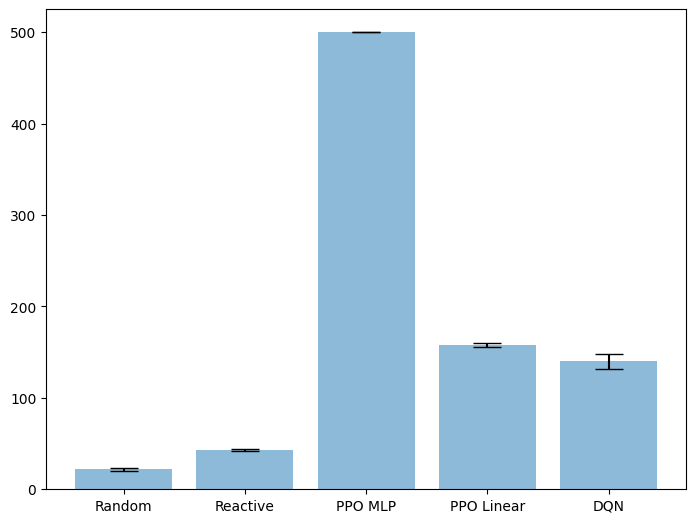

In [ ]:
import matplotlib.pyplot as plt

#Plot the results
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

algs = ['Random', 'Reactive', 'PPO MLP', 'PPO Linear', 'DQN']
means = [uniform_policy_mean, reactive_policy_mean, ppo_mlp_mean, ppo_linear_mean, dqn_mlp_mean]
errors = [uniform_policy_std, reactive_policy_std, ppo_mlp_std, ppo_linear_std, dqn_mlp_std]

ax.bar(algs, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.show()